<a href="https://colab.research.google.com/github/dmmajithia/acapp-train-classification/blob/main/acapp%20coal%20training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import tensorflow.keras as keras
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [3]:
train_data_dir = '/content/acapp-train-classification/acapp_data/training_images/'

In [1]:
!git clone https://github.com/dmmajithia/acapp-train-classification.git

Cloning into 'acapp-train-classification'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 44055 (delta 0), reused 0 (delta 0), pack-reused 44052
Receiving objects: 100% (44055/44055), 704.47 MiB | 38.44 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Checking out files: 100% (43326/43326), done.


In [48]:
img_height, img_width = 300,300
batch_size = 100
train_datagen = ImageDataGenerator(rescale=1./255,
    validation_split=0.3) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    class_mode='sparse',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
    class_mode='sparse',
    subset='validation') # set as validation data

Found 3026 images belonging to 5 classes.
Found 1294 images belonging to 5 classes.


In [60]:
# acc = 85-90, batch_size = 100, epochs = 10
input_shape = (300, 300, 3)
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, kernel_size=(3,3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))

In [54]:
# input_shape = (300, 300, 3)
# # Creating a Sequential Model and adding the layers
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(32, kernel_size=(3,3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Conv2D(64, kernel_size=(3,3)))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Conv2D(128, kernel_size=(3,3)))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.1))
# # model.add(Dense(128, activation='relu'))
# # model.add(Dropout(0.2))
# model.add(Dense(5,activation='softmax'))

In [61]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
epochs = 20

history = model.fit_generator(
    train_generator,
    steps_per_epoch=int(np.ceil(train_generator.n / float(batch_size))),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=int(np.ceil(validation_generator.n / float(batch_size)))
)

Epoch 1/20
31/31 [==============================] - 15s 491ms/step - loss: 2.6637 - accuracy: 0.6576 - val_loss: 0.5069 - val_accuracy: 0.8292
Epoch 2/20
10/31 [========>.....................] - ETA: 7s - loss: 0.3104 - accuracy: 0.8790

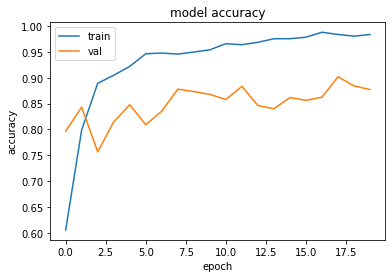

In [58]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

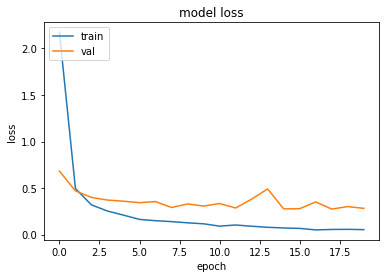

In [59]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()